# 0. Welcome <a name="Welcome"></a>

In this notebook, we are going to be looking at the fairness library AIF360 for the 934G5: Machine Learning Coursework.

Moreover, the Submit_ML_Coursework_Final_Part1 presents implementation of the methods learned during the ML course. While the Submit_ML_Coursework_Final_Part2 demostrates techniques and methods which supplement what was learned during the ML course.

- $Candidate Number:$ 250945
- $Date:$    Spring 2021


In [1]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 8.2 MB/s 
     |████████████████████████████████| 564 kB 45.3 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=042219cf61a24f446d1f8dc6e877d225e3ffa264a2eb143b5db219167851ac2c
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [2]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-13 13:10:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  16.3MB/s    in 0.2s    

2022-05-13 13:10:16 (16.3 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-05-13 13:10:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [4]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german


In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

--2022-05-13 13:10:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77.92K  --.-KB/s    in 0.06s   

2022-05-13 13:10:17 (1.35 MB/s) - ‘german.data’ saved [79793/79793]

--2022-05-13 13:10:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4679 (4.6K) [application/x-httpd-php]
Saving to: ‘german.doc’

german.doc          100%[===================>]   4.57K  --.-KB/s    in 0s 

In [6]:
! pip install "fairlearn"

     |████████████████████████████████| 177 kB 7.1 MB/s 


In [7]:
!pip install BlackBoxAuditing

     |████████████████████████████████| 2.6 MB 8.6 MB/s 
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394770 sha256=9284f3c0c0062cf304afdf9137adad4804fc88ae9e966a0ead486ff872210a2c
  Stored in directory: /root/.cache/pip/wheels/05/9f/ee/541a74be4cf5dad17430e64d3276370ea7b6a834a76cb4215a
Successfully built BlackBoxAuditing


In [8]:
#Baseline code adapted from sections of V Sharmanska. 
#STEP 1: Import the necessary libraries

# Libraries to study in aif360
from aif360.datasets import AdultDataset, GermanDataset, BankDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult,load_preproc_data_german
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing
from aif360.algorithms.postprocessing import  EqOddsPostprocessing, RejectOptionClassification
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover,GerryFairClassifier
from aif360.algorithms.preprocessing import LFR, Reweighing,DisparateImpactRemover
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

# Sklearn imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import *
from sklearn.model_selection import KFold

# ML libraries
import pdb
import numpy as np
import tensorflow as tf
import torch
import time
from torch import optim
from torch import nn
from torch.nn import functional as F
from typing import Callable
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

np.random.seed(0)

## Task1: 

- The standard machine learning methods such as logistic regression, support vector machines, multi-layer perceptron use a trade-off hyperparameter (lambda, learning rate) to trade-off accuracy and generalisation (Lecture 5). ***The first task is to analyse whether or not better generalisation could correspond to fairer models.***

- Specifically, for a given machine learning model of your choice, use training data to perform 5-fold cross validation. By varying the trade-off hyperparameter, select (1) the model with the highest accuracy, and (2) the model with the best fairness metric across 5 folds 1. 

- After this model selection step, compute and report final accuracy and fairness metrics for both models (1) and (2) on the test set.


### Task 1 Code

In [10]:
start = time.time()#this is to measure elapsed time

def task1_vanilla_test(load_preproc=load_preproc_data_adult):

  privileged_groups = [{'sex': 1}]
  unprivileged_groups = [{'sex': 0}]
  dataset_orig = load_preproc(['sex'])

  #STEP 3: We split between training and test set.
  train_, test_ = dataset_orig.split([0.7], shuffle=True)
  print("training data size", train_.features.shape)
  print("dataset feature names", train_.feature_names)

  kf = KFold(n_splits=5, random_state=41, shuffle=True)
  results_ = {}
  results_gini2 = {}
  results_gini26 = {}

  # Different criterions
  criterions = ['gini', 'entropy']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
  max_depth.append(None)

  for criterion_1 in criterions:

      for depth in max_depth:

        for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):

          trainining_ = train_.subset(train_index)
          testing_ = train_.subset(test_index)

          #Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
          scale = StandardScaler()

          X_train_ = scale.fit_transform(trainining_.features)
          y_train_ = trainining_.labels.ravel()

          X_test_ = scale.transform(testing_.features) 
          y_test_ = testing_.labels.ravel()

          #STEP 7: fitting and predicting our labels using our classification algorithm
          learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)  
          learner.fit(X_train_,y_train_)
          predictions = learner.predict(X_test_)
          model_acc = sum(predictions==y_test_)/len(y_test_)

          test_pred = testing_.copy()
          test_pred.labels = predictions

          #STEP 8: Retrieving the fairness metrics from our classification algorithm after pre and post processing
          metric_pred = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
          classified_metric = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

          #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
          result = {'Accuracy':model_acc,'statistical_parity_difference': metric_pred.statistical_parity_difference(),
                    'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

          results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 
  return results_,test_,train_ 
end = time.time()
total = end - start
print('Total elapsed time was',total)

Total elapsed time was 0.0007388591766357422


In [16]:
start = time.time()#this is to measure elapsed time
def avenger_dictionary(dict_):
  
  '''
  After the dict is retrieved and each metric is separated using the retrive_metrics_dataframe, 
  the dictionaries values for each column are split into the four avaliable accuracy metrics 
  and an average is calculated.
  '''
  Accmean = sum(col['Accuracy'] for col in dict_)/ len(dict_)
  Statmean = sum(col['statistical_parity_difference'] for col in dict_)/ len(dict_)
  Dispmean = sum(col['disparate_impact'] for col in dict_)/ len(dict_)
  Equalmean = sum(col['equal_opportunity_difference'] for col in dict_)/ len(dict_)
  keys = ['Accuracy', 'statistical_parity_difference', 'disparate_impact','equal_opportunity_difference']
  values = [Accmean, Statmean, Dispmean,Equalmean]

  dictionary = dict(zip(keys, values))

  return dictionary

def retrive_metrics_dataframe(results_dict):
  '''
  This function uses the results_dict dictionary retrived from the task1_vanilla_test function
  and returns a dataframe with each metrics with the assistance of the avenger_dictionary function
  '''
  results_2_entropy,results_2_gini = [],[]

  results_26_entropy,results_26_gini =  [],[]

  results_51_entropy,results_51_gini =  [],[]

  results_75_entropy,results_75_gini = [],[]

  results_100_entropy,results_100_gini = [],[]

  results_None_entropy,results_None_gini = [],[]

  for key in results_dict.keys():

    if key[1:]=='DecisionTree_entropy2':
      results_2_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini2':
      results_2_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy26':
      results_26_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini26':
      results_26_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy51':
      results_51_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini51':
      results_51_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy100':
      results_100_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini100':
      results_100_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropyNone':
      results_None_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_giniNone':
      results_None_gini.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['DecisionTree_entropy2'] = avenger_dictionary(results_2_entropy)
  results_dataframe['DecisionTree_gini2'] = avenger_dictionary(results_2_gini)
  results_dataframe['DecisionTree_entropy26'] = avenger_dictionary(results_26_entropy)
  results_dataframe['DecisionTree_gini26'] = avenger_dictionary(results_26_gini)
  results_dataframe['DecisionTree_entropy51'] = avenger_dictionary(results_51_entropy)
  results_dataframe['DecisionTree_gini51'] = avenger_dictionary(results_51_gini)
  results_dataframe['DecisionTree_entropy100'] = avenger_dictionary(results_100_entropy)
  results_dataframe['DecisionTree_gini100'] = avenger_dictionary(results_100_gini)
  results_dataframe['DecisionTree_entropyNone'] = avenger_dictionary(results_None_entropy)
  results_dataframe['DecisionTree_giniNone'] = avenger_dictionary(results_None_gini)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_


### Task 1.2 Adult dataset results

In [17]:
start = time.time()#this is to measure elapsed time
results,test_data,train_data= task1_vanilla_test(load_preproc_data_adult)
df = retrive_metrics_dataframe(results)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']
Total elapsed time was 4.817979097366333


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.785136,-0.069646,0.688326,-0.001294
DecisionTree_gini2,0.785136,-0.069646,0.688326,-0.001294
DecisionTree_entropy26,0.803182,-0.219895,0.000000,-0.466133
DecisionTree_gini26,0.803182,-0.219895,0.000000,-0.466133
DecisionTree_entropy51,0.803182,-0.219895,0.000000,-0.466133
DecisionTree_gini51,0.803182,-0.219895,0.000000,-0.466133
DecisionTree_entropy100,0.803182,-0.219895,0.000000,-0.466133
DecisionTree_gini100,0.803182,-0.219895,0.000000,-0.466133
DecisionTree_entropyNone,0.803182,-0.219895,0.000000,-0.466133
DecisionTree_giniNone,0.803182,-0.219895,0.000000,-0.466133


### Task 1.3 German dataset results

In [18]:
start = time.time()#this is to measure elapsed time
results_1,test_data_1,train_data_1 = task1_vanilla_test(load_preproc_data_german)
df_1 = retrive_metrics_dataframe(results_1)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df_1

training data size (700, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']
Total elapsed time was 0.2506377696990967


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.7,0.000000,1.000000,0.000000
DecisionTree_gini2,0.7,0.000000,1.000000,0.000000
DecisionTree_entropy26,0.7,-0.147335,0.843343,-0.090769
DecisionTree_gini26,0.7,-0.147335,0.843343,-0.090769
DecisionTree_entropy51,0.7,-0.147335,0.843343,-0.090769
DecisionTree_gini51,0.7,-0.147335,0.843343,-0.090769
DecisionTree_entropy100,0.7,-0.147335,0.843343,-0.090769
DecisionTree_gini100,0.7,-0.147335,0.843343,-0.090769
DecisionTree_entropyNone,0.7,-0.147335,0.843343,-0.090769
DecisionTree_giniNone,0.7,-0.147335,0.843343,-0.090769


No handles with labels found to put in legend.


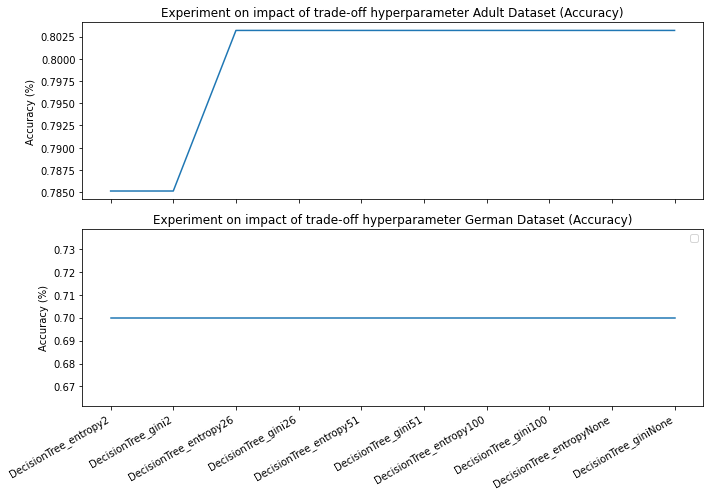

In [19]:
#fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(10,7))

ax[0].plot(df['Accuracy']) #row=0, col=0
ax[1].plot(df_1['Accuracy']) #row=0, col=0

ax[0].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter Adult Dataset (Accuracy)")
ax[1].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter German Dataset (Accuracy)")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
plt.legend()
plt.show()

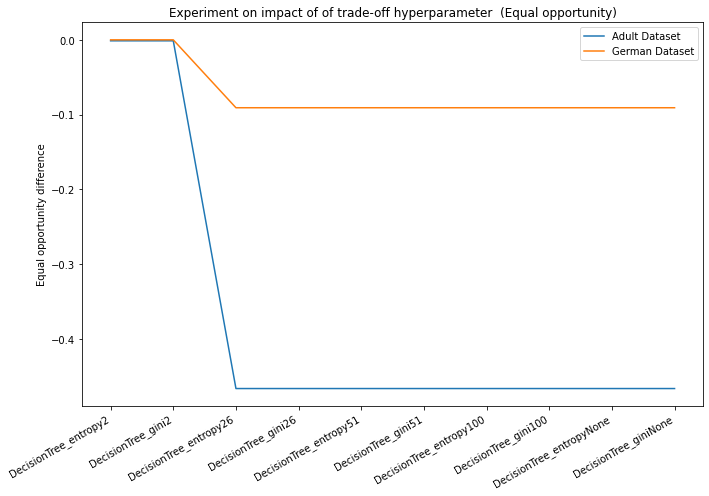

In [20]:
fig = plt.figure(figsize=(10,7))

plt.plot(df['equal_opportunity_difference'],label='Adult Dataset') #row=0, col=1
plt.plot(df_1['equal_opportunity_difference'],label='German Dataset') #row=1, col=1
plt.ylabel('Equal opportunity difference') 
plt.title("Experiment on impact of of trade-off hyperparameter  (Equal opportunity)")
#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
plt.legend()
plt.show()

<Figure size 720x360 with 0 Axes>

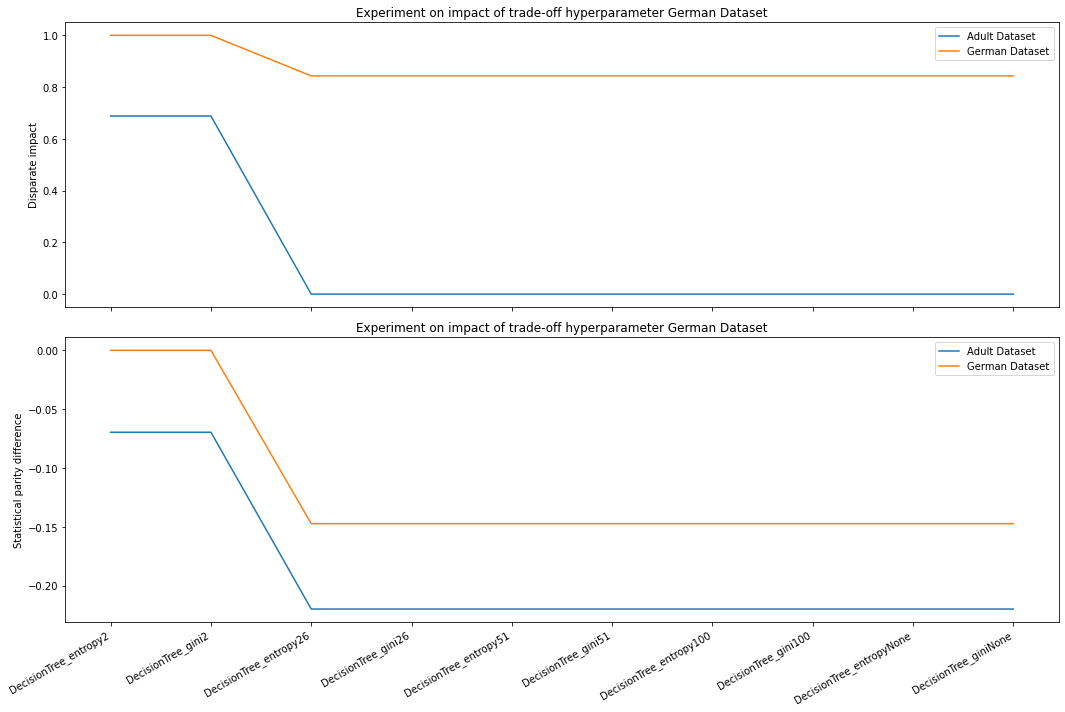

In [21]:
#extra fariness metrics
fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(15,10))

ax[0].plot(df['disparate_impact'],label='Adult Dataset') #row=0, col=0
ax[0].plot(df_1['disparate_impact'],label='German Dataset') #row=0, col=0
ax[1].plot(df['statistical_parity_difference'],label='Adult Dataset') #row=0, col=1
ax[1].plot(df_1['statistical_parity_difference'],label='German Dataset') #row=1, col=1

ax[0].set(ylabel="Disparate impact",title="Experiment on impact of trade-off hyperparameter Adult Dataset")
ax[0].set(ylabel="Disparate impact",title="Experiment on impact of trade-off hyperparameter German Dataset")
ax[1].set(ylabel="Statistical parity difference",title="Experiment on impact of of trade-off hyperparameter Adult Dataset")
ax[1].set(ylabel="Statistical parity difference",title="Experiment on impact of trade-off hyperparameter German Dataset")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
ax[0].legend()
ax[1].legend()
plt.show()

### Task 1.4 Results using the best models 

In [22]:
def fit_traintest(data1_train,criterions,max_depts):

  scale = StandardScaler()
  #refit on the whole training data; so return that section as well.
  X_train_ = scale.fit_transform(data1_train.features)
  y_train_ = data1_train.labels.ravel()

  X_test_ = scale.transform(data1_train.features) 
  y_test_ = data1_train.labels.ravel()

  learner = DecisionTreeClassifier(criterion=criterions, max_depth=max_depts)  
  learner.fit(X_train_,y_train_)
  predictions = learner.predict(X_test_)

  test_pred = data1_train.copy()
  test_pred.labels = predictions
  model_acc = sum(predictions==y_test_)/len(y_test_)

  privileged_groups = [{'sex': 1}]
  unprivileged_groups = [{'sex': 0}]
  metric = ClassificationMetric(data1_train, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  metric_equal_opp = metric.equal_opportunity_difference()
  print("Accuracy", model_acc,'Equal oppportunity metric',metric_equal_opp)


In [23]:
print('Results from Adult Dataset')
print('Model with highest accuracy',df['Accuracy'].idxmax(),df['Accuracy'].max())
print('Model with highest fairness',df['equal_opportunity_difference'].idxmax(),df['equal_opportunity_difference'].max())

Results from Adult Dataset
Model with highest accuracy DecisionTree_entropy26 0.8031823684618169
Model with highest fairness DecisionTree_entropy2 -0.0012944176234189753


In [24]:
print('The model with the best accuracy score has the followig metrics: ')
fit_traintest(train_data,criterions='entropy',max_depts=26)
print('The model with the best fairness score the followig accuracies: ')
fit_traintest(train_data,criterions='entropy',max_depts=2)

The model with the best accuracy score has the followig metrics: 
Accuracy 0.8040890344847758 Equal oppportunity metric -0.4640709991411394
The model with the best fairness score the followig accuracies: 
Accuracy 0.7851355699201498 Equal oppportunity metric -0.00011847155402555654


In [25]:
print('Results from German Dataset')
print('Model with highest accuracy',df_1['Accuracy'].idxmax(),df_1['Accuracy'].max())
print('Model with highest fairness',df_1['equal_opportunity_difference'].idxmax(),df_1['equal_opportunity_difference'].max())

Results from German Dataset
Model with highest accuracy DecisionTree_entropy2 0.7
Model with highest fairness DecisionTree_entropy2 0.0


In [26]:
print('The model with the best accuracy score has the followig metrics: ')
fit_traintest(train_data_1,criterions='entropy',max_depts=26)
print('The model with the best fairness score the followig accuracies: ')
fit_traintest(train_data_1,criterions='entropy',max_depts=2)

The model with the best accuracy score has the followig metrics: 
Accuracy 0.7271428571428571 Equal oppportunity metric -0.09225387306346833
The model with the best fairness score the followig accuracies: 
Accuracy 0.7 Equal oppportunity metric 0.0


## Task2: 

Now choose an algorithmic fairness method, e.g. reweighing (Lecture 7), and perform the same analysis, i.e. how varying the hyperparameter(s) impacts accuracy and fairness metrics during model selection.

Specifically, using the same 5-fold cross validation as in Task 1, perform validation by varying the trade-off hyperparameter and select (3) the model with the highest accuracy, and (4) the model with the best fairness metric across 5 folds. After model selection, compute and report
final accuracy and fairness for both models (3) and (4) on the test set.

In [29]:
start = time.time()#this is to measure elapsed time

def task2_vanilla_test(load_preproc=load_preproc_data_adult):

  privileged_groups = [{'sex': 1}]
  unprivileged_groups = [{'sex': 0}]
  dataset_orig = load_preproc(['sex'])

  #STEP 3: We split between training and test set.
  train_, test_ = dataset_orig.split([0.7], shuffle=True)
  print("training data size", train_.features.shape)
  print("dataset feature names", train_.feature_names)

  kf = KFold(n_splits=5, random_state=41, shuffle=True)
  results_ = {}

  # Different criterions
  criterions = ['gini', 'entropy']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
  max_depth.append(None)

  for criterion_1 in criterions:
    for depth in max_depth:
        for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):

          trainining_ = train_.subset(train_index)
          testing_ = train_.subset(test_index)

          #Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
          scale = StandardScaler()

          X_train_ = scale.fit_transform(trainining_.features)
          y_train_ = trainining_.labels.ravel()

          X_test_ = scale.transform(testing_.features) 
          y_test_ = testing_.labels.ravel()

          #STEP 5: Mitigate the bias, e.g. by transforming the original dataset via DisparateImpactRemover.
          di = DisparateImpactRemover(sensitive_attribute='sex',repair_level = 0.85)
          #We obtain a set of weights for the training set, to use in scikit-learn.
          trainining_weight = di.fit_transform(trainining_)
    
          #STEP 6: fitting and predicting our labels using our classification algorithm
          learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)  
          learner.fit(X_train_,y_train_,sample_weight=trainining_weight.instance_weights)
          predictions = learner.predict(X_test_)
          model_acc = sum(predictions==y_test_)/len(y_test_)

          test_pred = testing_.copy()
          test_pred.labels = predictions

          #STEP 7: Post processing algorithm callibrated equal odds
          CPP = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                              unprivileged_groups = unprivileged_groups,
                                              cost_constraint="weighted",
                                              seed=42)

          CPP = CPP.fit(testing_, test_pred)
          transf_test_pred = CPP.predict(test_pred)

          #STEP 8: Retrieving the fairness metrics from our classification algorithm after pre and post processing
          metric_pred = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
          classified_metric = ClassificationMetric(testing_, transf_test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

          #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
          result = {'Accuracy':model_acc,'statistical_parity_difference': metric_pred.statistical_parity_difference(),
                    'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

          results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 
  return results_,test_,train_
end = time.time()
total = end - start
print('Total elapsed time was',total)

Total elapsed time was 0.0007011890411376953


In [28]:
start = time.time()#this is to measure elapsed time

def task2_vanilla_test_extra(load_preproc=load_preproc_data_adult):

  privileged_groups = [{'sex': 1}]
  unprivileged_groups = [{'sex': 0}]
  dataset_orig = load_preproc(['sex'])

  #STEP 3: We split between training and test set.
  train_, test_ = dataset_orig.split([0.7], shuffle=True)
  print("training data size", train_.features.shape)
  print("dataset feature names", train_.feature_names)

  kf = KFold(n_splits=5, random_state=41, shuffle=True)
  results_ = {}

  # Different criterions
  criterions = ['gini', 'entropy']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
  max_depth.append(None)

  for criterion_1 in criterions:

    for depth in max_depth:

      for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):

        trainining_ = train_.subset(train_index)
        testing_ = train_.subset(test_index)

        #Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
        scale = StandardScaler()

        X_train_ = scale.fit_transform(trainining_.features)
        y_train_ = trainining_.labels.ravel()

        X_test_ = scale.transform(testing_.features) 
        y_test_ = testing_.labels.ravel()

        #STEP 5: Mitigate the bias, e.g. by transforming the original dataset via DisparateImpactRemover.
        di = DisparateImpactRemover(sensitive_attribute='sex',repair_level = 0.85)
        #We obtain a set of weights for the training set, to use in scikit-learn.
        trainining_weight = di.fit_transform(trainining_)
    
        #STEP 6: fitting and predicting using our classification algorithm
        learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)  
        learner.fit(X_train_,y_train_,sample_weight=trainining_weight.instance_weights)
        predictions = learner.predict(X_test_)
        model_acc = sum(predictions==y_test_)/len(y_test_)

        test_pred = testing_.copy()
        test_pred.labels = predictions
        #STEP 7: Retrieving the fairness metrics from our classification algorithm after pre and post processing
        metric_pred = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
        classified_metric = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

        #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
        result = {'Accuracy':model_acc,'statistical_parity_difference': metric_pred.statistical_parity_difference(),
                  'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}

        results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 
  return results_,test_,train_
end = time.time()
total = end - start
print('Total elapsed time was',total)

Total elapsed time was 0.0008096694946289062


### Task 2 Section 1

In [ ]:
start = time.time()#this is to measure elapsed time
results_2,test_data_2,train_data_2 = task2_vanilla_test_extra(load_preproc_data_adult)
df_2 = retrive_metrics_dataframe(results_2)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df_2

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']
Total elapsed time was 28.36413884162903


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.788616,-0.064803,0.705212,0.013306
DecisionTree_gini2,0.788616,-0.064803,0.705212,0.013306
DecisionTree_entropy26,0.806575,-0.212798,0.000000,-0.460131
DecisionTree_gini26,0.806575,-0.212798,0.000000,-0.460131
DecisionTree_entropy51,0.806575,-0.212798,0.000000,-0.460131
DecisionTree_gini51,0.806575,-0.212798,0.000000,-0.460131
DecisionTree_entropy100,0.806575,-0.212798,0.000000,-0.460131
DecisionTree_gini100,0.806575,-0.212798,0.000000,-0.460131
DecisionTree_entropyNone,0.806575,-0.212798,0.000000,-0.460131
DecisionTree_giniNone,0.806575,-0.212798,0.000000,-0.460131


In [ ]:
start = time.time()#this is to measure elapsed time
results_2,test_data_2,train_data_2_ = task2_vanilla_test_extra(load_preproc_data_german)
df_2_ = retrive_metrics_dataframe(results_2)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df_2_

training data size (700, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']
Total elapsed time was 0.2644670009613037


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.702857,0.000000,1.000000,0.000000
DecisionTree_gini2,0.702857,0.000000,1.000000,0.000000
DecisionTree_entropy26,0.690000,-0.167734,0.821744,-0.110784
DecisionTree_gini26,0.690000,-0.167734,0.821744,-0.110784
DecisionTree_entropy51,0.690000,-0.167734,0.821744,-0.110784
DecisionTree_gini51,0.690000,-0.167734,0.821744,-0.110784
DecisionTree_entropy100,0.690000,-0.167734,0.821744,-0.110784
DecisionTree_gini100,0.688571,-0.171900,0.816892,-0.116845
DecisionTree_entropyNone,0.690000,-0.167734,0.821744,-0.110784
DecisionTree_giniNone,0.690000,-0.167734,0.821744,-0.110784


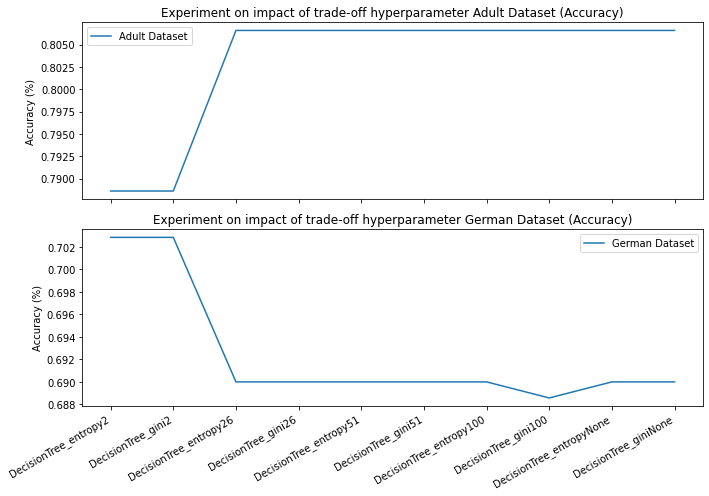

In [ ]:
#fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(10,7))

ax[0].plot(df_2['Accuracy'],label='Adult Dataset') #row=0, col=0
ax[1].plot(df_2_['Accuracy'],label='German Dataset') #row=0, col=0

ax[0].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter Adult Dataset (Accuracy)")
ax[1].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter German Dataset (Accuracy)")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
ax[0].legend()
ax[1].legend()
plt.show()

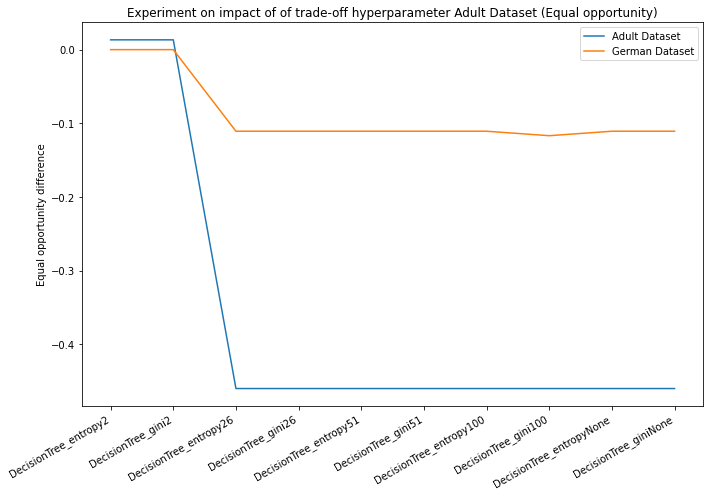

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(df_2['equal_opportunity_difference'],label='Adult Dataset') #row=0, col=1
plt.plot(df_2_['equal_opportunity_difference'],label='German Dataset') #row=1, col=1
plt.ylabel('Equal opportunity difference') 
plt.title("Experiment on impact of of trade-off hyperparameter Adult Dataset (Equal opportunity)")
#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
plt.legend()
plt.show()

In [ ]:
print('Results from Adult Dataset')
print('Model with highest accuracy',df_2['Accuracy'].idxmax(),df['Accuracy'].max())
print('Model with highest fairness',df_2['equal_opportunity_difference'].idxmax(),df['equal_opportunity_difference'].max())

Results from Adult Dataset
Model with highest accuracy DecisionTree_entropy26 0.8037671850981336
Model with highest fairness DecisionTree_entropy2 -0.0026581337164454876


In [ ]:
print('The model with the best accuracy score has the followig metrics: ')
fit_traintest(train_data_2,criterions='entropy',max_depts=26)
print('The model with the best fairness score the followig accuracies: ')
fit_traintest(train_data_2,criterions='entropy',max_depts=2)

The model with the best accuracy score has the followig metrics: 
Accuracy 0.8072186960718359 Equal oppportunity metric -0.4619714244479723
The model with the best fairness score the followig accuracies: 
Accuracy 0.78861622159174 Equal oppportunity metric 0.012359771492590321


In [ ]:
print('Results from German Dataset')
print('Model with highest accuracy',df_2_['Accuracy'].idxmax(),df_1['Accuracy'].max())
print('Model with highest fairness',df_2_['equal_opportunity_difference'].idxmax(),df_1['equal_opportunity_difference'].max())

Results from German Dataset
Model with highest accuracy DecisionTree_entropy2 0.6914285714285715
Model with highest fairness DecisionTree_entropy2 0.0


In [ ]:
print('The model with the best accuracy score has the followig metrics: ')
fit_traintest(train_data_2_,criterions='entropy',max_depts=26)
print('The model with the best fairness score the followig accuracies: ')
fit_traintest(train_data_2_,criterions='entropy',max_depts=2)

The model with the best accuracy score has the followig metrics: 
Accuracy 0.7342857142857143 Equal oppportunity metric -0.09951670025632486
The model with the best fairness score the followig accuracies: 
Accuracy 0.7028571428571428 Equal oppportunity metric 0.0


### Task 2 Section 2

#### Task 2.1 Adult Dataset results

In [ ]:
start = time.time()#this is to measure elapsed time
results_2,test_data_2,train_data_2 = task2_vanilla_test(load_preproc_data_adult)
df_2 = retrive_metrics_dataframe(results_2)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df_2

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']
Total elapsed time was 28.2118718624115


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.786130,-0.197034,0.354287,0.0
DecisionTree_gini2,0.786130,-0.197034,0.354287,0.0
DecisionTree_entropy26,0.802451,-0.197034,0.354287,0.0
DecisionTree_gini26,0.802451,-0.197034,0.354287,0.0
DecisionTree_entropy51,0.802451,-0.197034,0.354287,0.0
DecisionTree_gini51,0.802451,-0.197034,0.354287,0.0
DecisionTree_entropy100,0.802451,-0.197034,0.354287,0.0
DecisionTree_gini100,0.802451,-0.197034,0.354287,0.0
DecisionTree_entropyNone,0.802451,-0.197034,0.354287,0.0
DecisionTree_giniNone,0.802451,-0.197034,0.354287,0.0


### Task 2.2 German Dataset results

In [ ]:
start = time.time()#this is to measure elapsed time
results_2,test_data_2,train_data_2_ = task2_vanilla_test(load_preproc_data_german)
df_2_ = retrive_metrics_dataframe(results_2)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df_2_

training data size (700, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']
Total elapsed time was 0.5942478179931641


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference
DecisionTree_entropy2,0.717143,-0.092827,0.878041,0.0
DecisionTree_gini2,0.714286,-0.092827,0.878041,0.0
DecisionTree_entropy26,0.728571,-0.092827,0.878041,0.0
DecisionTree_gini26,0.724286,-0.092827,0.878041,0.0
DecisionTree_entropy51,0.728571,-0.092827,0.878041,0.0
DecisionTree_gini51,0.724286,-0.092827,0.878041,0.0
DecisionTree_entropy100,0.728571,-0.092827,0.878041,0.0
DecisionTree_gini100,0.724286,-0.092827,0.878041,0.0
DecisionTree_entropyNone,0.728571,-0.092827,0.878041,0.0
DecisionTree_giniNone,0.724286,-0.092827,0.878041,0.0


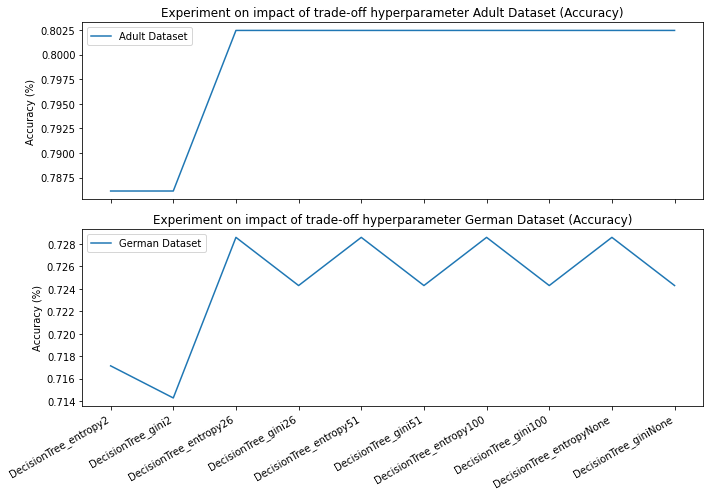

In [ ]:
#fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(10,7))

ax[0].plot(df_2['Accuracy'],label='Adult Dataset') #row=0, col=0
ax[1].plot(df_2_['Accuracy'],label='German Dataset') #row=0, col=0

ax[0].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter Adult Dataset (Accuracy)")
ax[1].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter German Dataset (Accuracy)")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
ax[0].legend()
ax[1].legend()
plt.show()

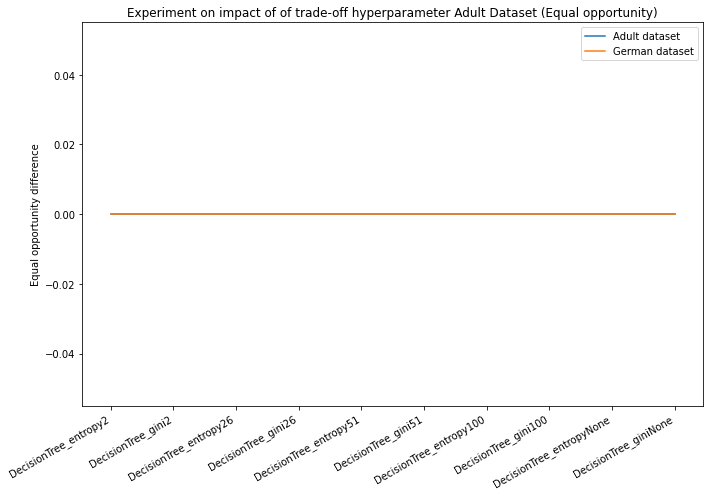

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(df_2['equal_opportunity_difference'],label='Adult dataset') #row=0, col=1
plt.plot(df_2_['equal_opportunity_difference'],label='German dataset') #row=1, col=1
plt.ylabel('Equal opportunity difference') 
plt.title("Experiment on impact of of trade-off hyperparameter Adult Dataset (Equal opportunity)")
#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
plt.legend()
plt.show()

In [ ]:
print('Results from Adult Dataset')
print('Model with highest accuracy',df_2['Accuracy'].idxmax(),df['Accuracy'].max())
print('Model with highest fairness',df_2['equal_opportunity_difference'].idxmax(),df['equal_opportunity_difference'].max())

Results from Adult Dataset
Model with highest accuracy DecisionTree_entropy26 0.8037671850981336
Model with highest fairness DecisionTree_entropy2 -0.0026581337164454876


In [ ]:
print('The model with the best accuracy score has the followig metrics: ')
fit_traintest(train_data_2,criterions='entropy',max_depts=26)
print('The model with the best fairness score the followig accuracies: ')
fit_traintest(train_data_2,criterions='entropy',max_depts=2)

The model with the best accuracy score has the followig metrics: 
Accuracy 0.8040305361373541 Equal oppportunity metric -0.46459733943641823
The model with the best fairness score the followig accuracies: 
Accuracy 0.7861300418263184 Equal oppportunity metric -0.0015689815477041846


In [ ]:
print('Results from German Dataset')
print('Model with highest accuracy',df_2_['Accuracy'].idxmax(),df_1['Accuracy'].max())
print('Model with highest fairness',df_2_['equal_opportunity_difference'].idxmax(),df_1['equal_opportunity_difference'].max())

Results from German Dataset
Model with highest accuracy DecisionTree_entropy26 0.6914285714285715
Model with highest fairness DecisionTree_entropy2 0.0


In [ ]:
print('The model with the best accuracy score has the followig metrics: ')
fit_traintest(train_data_2_,criterions='entropy',max_depts=26)
print('The model with the best fairness score the followig accuracies: ')
fit_traintest(train_data_2_,criterions='entropy',max_depts=2)

The model with the best accuracy score has the followig metrics: 
Accuracy 0.7528571428571429 Equal oppportunity metric -0.05145973429555517
The model with the best fairness score the followig accuracies: 
Accuracy 0.7214285714285714 Equal oppportunity metric -0.11513859275053306


## Task3 (Extra)

Based on your observations, suggest a model selection strategy (criterion)
that accounts for both, accuracy and fairness. Compare the standard machine learning model versus the fairness-based machine learning model using the proposed criterion - what is the effect (if any)?

Specifically, using the same 5-fold cross validation as before, select (5) the standard machine learning model (studied in Task 1), and (6) the fairness-based model (studied in Task 2) based on the proposed accuracy+fairness criterion. 

After model selection, compute and report final accuracy and fairness for both models (5) and (6) on the test set.

## Task 3.1 code for section 1

In [27]:
start = time.time()#this is to measure elapsed time

def task1_vanilla_test_newmetric(load_preproc=load_preproc_data_adult):

  privileged_groups = [{'sex': 1}]
  unprivileged_groups = [{'sex': 0}]
  dataset_orig = load_preproc(['sex'])

  #STEP 3: We split between training and test set.
  train_, test_ = dataset_orig.split([0.7], shuffle=True)
  print("training data size", train_.features.shape)
  print("dataset feature names", train_.feature_names)

  kf = KFold(n_splits=5, random_state=41, shuffle=True)
  results_ = {}

  # Different criterions
  criterions = ['gini', 'entropy']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(2, 100, num = 5)]
  max_depth.append(None)

  for criterion_1 in criterions:
    
    for depth in max_depth:
          
      for fold_num,(train_index, test_index) in enumerate(kf.split(train_.features)):

        trainining_ = train_.subset(train_index)
        testing_ = train_.subset(test_index)

        #Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
        scale = StandardScaler()

        X_train_ = scale.fit_transform(trainining_.features)
        y_train_ = trainining_.labels.ravel()

        X_test_ = scale.transform(testing_.features) 
        y_test_ = testing_.labels.ravel()
    
        learner = DecisionTreeClassifier(criterion=criterion_1,max_depth=depth)
        learner.fit(X_train_,y_train_)
        predictions = learner.predict(X_test_)
        model_acc = sum(predictions==y_test_)/len(y_test_)

        test_pred = testing_.copy()
        test_pred.labels = predictions
        metric_pred = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
        classified_metric = ClassificationMetric(testing_, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
        
        #retrieving metrics from the classifier. The accuracies include percentage of true pred, statistical parity difference, disparate impact and equal opportunity.
        new_metric = classified_metric.false_omission_rate(privileged=False)/(classified_metric.false_omission_rate(privileged=False) + classified_metric.false_omission_rate(privileged=True))
        if np.isnan(new_metric) == True:
          new_metric = 0.000000

        result = {'Accuracy':model_acc,'statistical_parity_difference': metric_pred.statistical_parity_difference(),
                  'disparate_impact': metric_pred.disparate_impact(),'equal_opportunity_difference': classified_metric.equal_opportunity_difference(),'proposed_metric':new_metric}


        results_[str(fold_num)+'DecisionTree_'+str(criterion_1)+str(depth)]=result#saving the results of the decision tree classifier 
  return results_,test_,train_
end = time.time()
total = end - start
print('Total elapsed time was',total)

Total elapsed time was 0.0006465911865234375


In [ ]:
start = time.time()#this is to measure elapsed time
def avenger_dictionary(dict_):
  
  Accmean = sum(col['Accuracy'] for col in dict_)/ len(dict_)
  Statmean = sum(col['statistical_parity_difference'] for col in dict_)/ len(dict_)
  Dispmean = sum(col['disparate_impact'] for col in dict_)/ len(dict_)
  Equalmean = sum(col['equal_opportunity_difference'] for col in dict_)/ len(dict_)
  NewMetric = sum(col['proposed_metric'] for col in dict_)/ len(dict_)
  keys = ['Accuracy', 'statistical_parity_difference', 'disparate_impact','equal_opportunity_difference','new_metric']
  values = [Accmean, Statmean, Dispmean,Equalmean,NewMetric]

  dictionary = dict(zip(keys, values))

  return dictionary

def retrive_metrics_dataframe(results_dict):
  results_2_entropy,results_2_gini = [],[]

  results_26_entropy,results_26_gini =  [],[]

  results_51_entropy,results_51_gini =  [],[]

  results_75_entropy,results_75_gini = [],[]

  results_100_entropy,results_100_gini = [],[]

  results_None_entropy,results_None_gini = [],[]

  for key in results_dict.keys():

    if key[1:]=='DecisionTree_entropy2':
      results_2_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini2':
      results_2_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy26':
      results_26_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini26':
      results_26_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy51':
      results_51_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini51':
      results_51_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropy100':
      results_100_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_gini100':
      results_100_gini.append(results_dict[key])

    if key[1:]=='DecisionTree_entropyNone':
      results_None_entropy.append(results_dict[key])
    if key[1:]=='DecisionTree_giniNone':
      results_None_gini.append(results_dict[key])

  results_dataframe = {}
  results_dataframe['DecisionTree_entropy2'] = avenger_dictionary(results_2_entropy)
  results_dataframe['DecisionTree_gini2'] = avenger_dictionary(results_2_gini)
  results_dataframe['DecisionTree_entropy26'] = avenger_dictionary(results_26_entropy)
  results_dataframe['DecisionTree_gini26'] = avenger_dictionary(results_26_gini)
  results_dataframe['DecisionTree_entropy51'] = avenger_dictionary(results_51_entropy)
  results_dataframe['DecisionTree_gini51'] = avenger_dictionary(results_51_gini)
  results_dataframe['DecisionTree_entropy100'] = avenger_dictionary(results_100_entropy)
  results_dataframe['DecisionTree_gini100'] = avenger_dictionary(results_100_gini)
  results_dataframe['DecisionTree_entropyNone'] = avenger_dictionary(results_None_entropy)
  results_dataframe['DecisionTree_giniNone'] = avenger_dictionary(results_None_gini)
  df_ = []
  df_ = pd.DataFrame(results_dataframe).T

  return df_


### Task 3.1.1 Adult Dataset results

In [ ]:
start = time.time()#this is to measure elapsed time
results,test_data,train_data = task1_vanilla_test_newmetric(load_preproc_data_adult)
df = retrive_metrics_dataframe(results)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']
Total elapsed time was 3.217707633972168


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference,new_metric
DecisionTree_entropy2,0.785311,-0.066950,0.696766,0.008233,0.246120
DecisionTree_gini2,0.785311,-0.066950,0.696766,0.008233,0.246120
DecisionTree_entropy26,0.803387,-0.232725,0.000000,-0.488706,0.351268
DecisionTree_gini26,0.803358,-0.232681,0.000000,-0.488558,0.351220
DecisionTree_entropy51,0.803387,-0.232725,0.000000,-0.488706,0.351268
DecisionTree_gini51,0.803358,-0.232681,0.000000,-0.488558,0.351220
DecisionTree_entropy100,0.803387,-0.232725,0.000000,-0.488706,0.351268
DecisionTree_gini100,0.803358,-0.232681,0.000000,-0.488558,0.351220
DecisionTree_entropyNone,0.803387,-0.232725,0.000000,-0.488706,0.351268
DecisionTree_giniNone,0.803358,-0.232681,0.000000,-0.488558,0.351220


### Task 3.1.2 German Dataset results

In [ ]:
start = time.time()#this is to measure elapsed time
results_1,test_data_1,train_data_1 = task1_vanilla_test_newmetric(load_preproc_data_german)
df_1 = retrive_metrics_dataframe(results_1)
end = time.time()
total = end - start
print('Total elapsed time was',total)
df_1

training data size (700, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']
Total elapsed time was 0.1728065013885498


invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars


,Accuracy,statistical_parity_difference,disparate_impact,equal_opportunity_difference,new_metric
DecisionTree_entropy2,0.71,0.000000,1.000000,0.000000,0.000000
DecisionTree_gini2,0.71,0.000000,1.000000,0.000000,0.000000
DecisionTree_entropy26,0.70,-0.180506,0.808422,-0.109254,0.381918
DecisionTree_gini26,0.70,-0.180506,0.808422,-0.109254,0.381918
DecisionTree_entropy51,0.70,-0.180506,0.808422,-0.109254,0.381918
DecisionTree_gini51,0.70,-0.180506,0.808422,-0.109254,0.381918
DecisionTree_entropy100,0.70,-0.180506,0.808422,-0.109254,0.381918
DecisionTree_gini100,0.70,-0.180506,0.808422,-0.109254,0.381918
DecisionTree_entropyNone,0.70,-0.180506,0.808422,-0.109254,0.381918
DecisionTree_giniNone,0.70,-0.180506,0.808422,-0.109254,0.381918


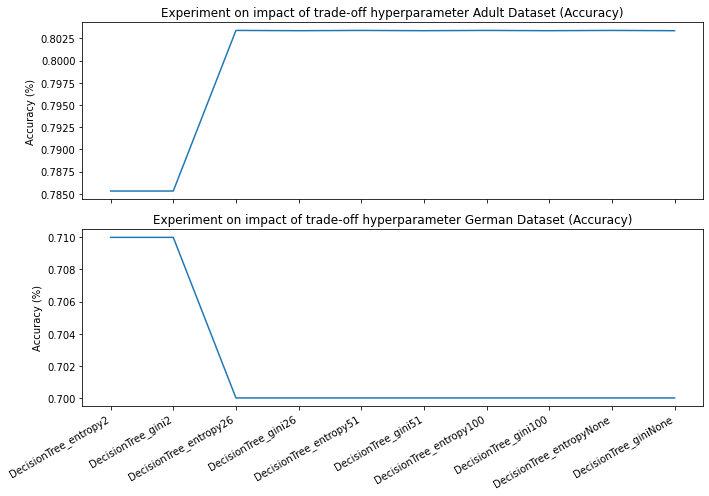

In [ ]:
#fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(10,7))

ax[0].plot(df['Accuracy']) #row=0, col=0
ax[1].plot(df_1['Accuracy']) #row=0, col=0

ax[0].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter Adult Dataset (Accuracy)")
ax[1].set(ylabel="Accuracy (%)",title="Experiment on impact of trade-off hyperparameter German Dataset (Accuracy)")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
plt.show()

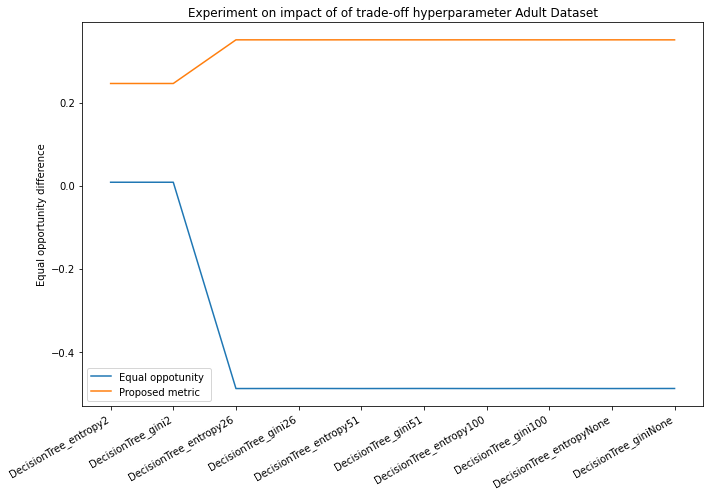

In [ ]:
fig = plt.figure(figsize=(10,7))

plt.plot(df['equal_opportunity_difference'],label='Equal oppotunity ') #row=0, col=1
plt.plot(df['new_metric'],label='Proposed metric') #row=0, col=1
plt.ylabel('Equal opportunity difference') 
plt.title("Experiment on impact of of trade-off hyperparameter Adult Dataset")
#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
plt.legend()
plt.show()

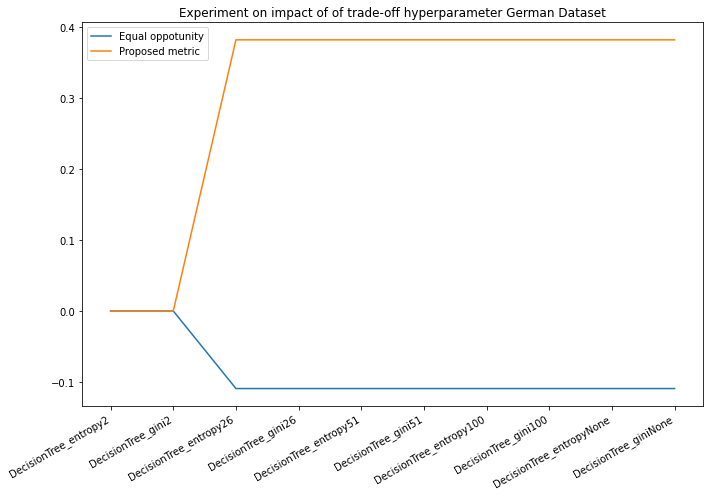

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.plot(df_1['equal_opportunity_difference'],label='Equal oppotunity') #row=1, col=1
plt.plot(df_1['new_metric'],label='Proposed metric') #row=1, col=1
plt.title("Experiment on impact of of trade-off hyperparameter German Dataset")
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
plt.legend()
plt.show()

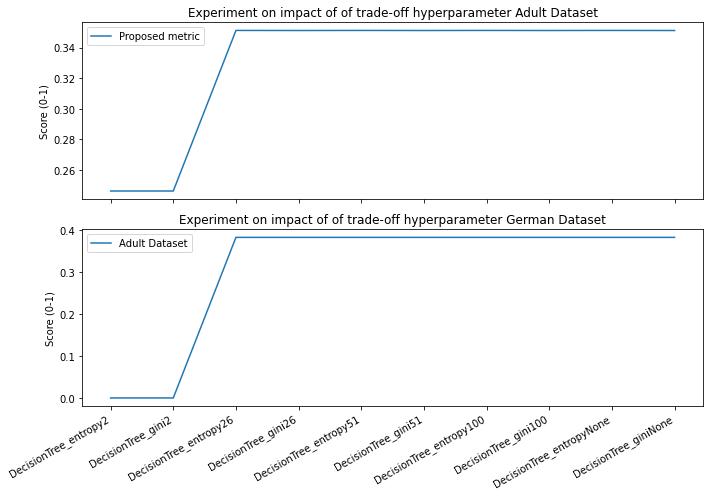

In [ ]:
#fig = plt.figure(figsize=(10,5))

fig, ax = plt.subplots(2, 1,figsize=(10,7))

#ax[0].plot(df['equal_opportunity_difference'],label='Equal oppotunity difference') #row=0, col=0
ax[0].plot(df['new_metric'],label='Proposed metric') #row=0, col=0
#ax[0].plot(df['Accuracy'],label='Accuracy') #row=0, col=0

#ax[1].plot(df_1['equal_opportunity_difference'],label='Equal oppotunity difference') #row=0, col=0
ax[1].plot(df_1['new_metric'],label='Adult Dataset') #row=0, col=0
#ax[1].plot(df['Accuracy'],label='Accuracy') #row=0, col=0

ax[0].set(ylabel="Score (0-1)",title="Experiment on impact of of trade-off hyperparameter Adult Dataset")
ax[1].set(ylabel="Score (0-1)",title="Experiment on impact of of trade-off hyperparameter German Dataset")

#reference:https://stackabuse.com/rotate-axis-labels-in-matplotlib/
fig.autofmt_xdate()#Rotate ticks to Fit in Matplotlib
fig.tight_layout()
ax[0].legend()
ax[1].legend()
plt.show()